#6.범주별로 연속형 변수의 평균차이가 있는지 검정

In [1]:
# [0] 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/E-Commerce _Shipping_Data.csv')
print(data.head())

Mounted at /content/drive
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44 

In [16]:
# t-test
# 연속형 변수 : 'Cost_of_the_Product', 'Weight_in_gms'.'Discount_offered'
# 범주형 변수 : 'Reached.on.Time_Y.N'

from scipy.stats import shapiro,kstest,bartlett
from scipy.stats import ttest_ind

#[1] 그룹 나누기
feature='Cost_of_the_Product'
condition_0 = data['Reached.on.Time_Y.N'] == 0
condition_1 = data['Reached.on.Time_Y.N'] == 1
group0 = data.loc[condition_0,feature]
group1 = data.loc[condition_1,feature]
print(feature,group0.shape,group1.shape)

Cost_of_the_Product (4436,) (6563,)


In [38]:
#[2] 정규성,등분산성 검정
statistic,pvalue = shapiro(group0)
print(f'shapiro / statistic : {statistic:.4f} p-value : {pvalue:.4f}')
statistic,pvalue = shapiro(group1)
print(f'shapiro / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

group0_series = group0.squeeze()  # DataFrame에서 Series로 변환
group1_series = group1.squeeze()
# Kolmogorov-Smirnov Test
statistic, pvalue = kstest(group0_series, 'norm', args=(group0_series.mean(), group0_series.std()))
print(f'kstest / statistic : {statistic:.4f} p-value : {pvalue:.4f}')
statistic, pvalue = kstest(group1_series, 'norm', args=(group1_series.mean(), group1_series.std()))
print(f'kstest / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

statistic,pvalue = bartlett(group0,group1)
print(f'bartlett / statistic : {statistic:.4f}')

shapiro / statistic : 0.9719 p-value : 0.0000
shapiro / statistic : 0.9723 p-value : 0.0000
kstest / statistic : 0.0772 p-value : 0.0000
kstest / statistic : 0.0697 p-value : 0.0000
bartlett / statistic : 0.2039


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6563.
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
#[2] 정규성,등분산성 검정
statistic,pvalue = shapiro(group0)
print(f'shapiro / statistic : {statistic:.4f} p-value : {pvalue:.4f}')
statistic,pvalue = shapiro(group1)
print(f'shapiro / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

# Kolmogorov-Smirnov Test
statistic, pvalue = kstest(group0, 'norm')
print(f'kstest / statistic : {statistic:.4f} p-value : {pvalue:.4f}')
statistic, pvalue = kstest(group1,'norm')
print(f'kstest / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

statistic,pvalue = bartlett(group0,group1)
print(f'bartlett / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

#[3] ttest_ind
statistic,pvalue = ttest_ind(group0,group1)
print(f'ttest_ind / statistic : {statistic:.4f} p-value : {pvalue:.4f}')

shapiro / statistic : 0.9719 p-value : 0.0000
shapiro / statistic : 0.9723 p-value : 0.0000
kstest / statistic : 1.0000 p-value : 0.0000
kstest / statistic : 1.0000 p-value : 0.0000
bartlett / statistic : 0.2039 p-value : 0.6516
ttest_ind / statistic : 7.7378 p-value : 0.0000


In [26]:
#[4] 결과
# p-value 0.05보다 작음
# 귀무가설을 기각한다.
# 두 그룹의 평균이 다르다
# statistic:7.7378 (group0.mean(),group1.mean())
mean_g0,mean_g1 =  group0.mean(), group1.mean()
print(f'{mean_g0:.4f} {mean_g1:.4f}')

214.4986 207.2892


In [34]:
def my_ttest_ind(data, feature, target):
    group0 = data.loc[data[target] == 0, feature]
    group1 = data.loc[data[target] == 1, feature]
    mean_g0, mean_g1 = group0.mean(), group1.mean()
    print(f'{mean_g0:.4f} {mean_g1:.4f}')
    _, pvalue = ttest_ind(group0, group1)
    print(f'ttest_ind / p-value : {pvalue:.4f}')
    print('유의미' if pvalue < 0.05 else '의미가 없다')

# 사용될 열 이름
for feature in ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']:
    print(feature)
    my_ttest_ind(data, feature, 'Reached.on.Time_Y.N')

Cost_of_the_Product
214.4986 207.2892
ttest_ind / p-value : 0.0000
유의미
Weight_in_gms
4168.6684 3272.6401
ttest_ind / p-value : 0.0000
유의미
Discount_offered
5.5460 18.6637
ttest_ind / p-value : 0.0000
유의미


#7.t-test의 예시문제

* 모평균에 관한 t-test
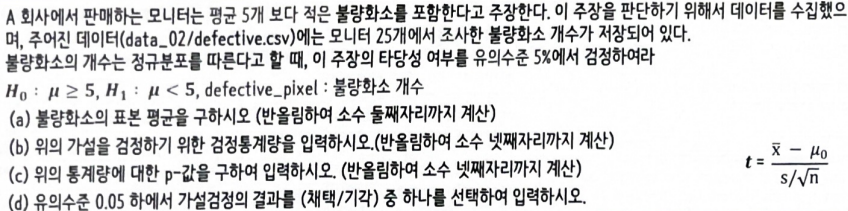

In [35]:
!git clone https://github.com/Soyoung-Yoon/data_02

fatal: destination path 'data_02' already exists and is not an empty directory.


In [46]:
import pandas as pd
from scipy.stats import ttest_1samp

data = pd.read_csv('data_02/defective.csv')
print(data.shape)
print(data.head(3))
print(round(data['defective_pixel'].mean(),2))

statistic,pvalue = ttest_1samp(data['defective_pixel'],5,alternative='less')
print(round(statistic,4))
print(round(pvalue,4))
print('기각' if pvalue<0.05 else '채택')

(25, 1)
   defective_pixel
0                5
1                5
2                5
4.84
-1.4446
0.0807
채택


#8.Paired t-test 예시문제


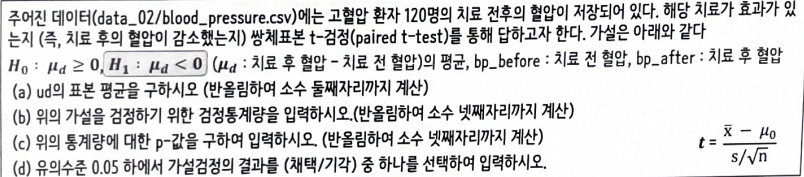

In [59]:
import pandas as pd
from scipy.stats import ttest_rel,ttest_1samp

a = pd.read_csv('data_02/blood_pressure.csv')
before,after = a['bp_before'],a['bp_after']

diff = after -before
statistic,pvalue = ttest_rel(after,before,alternative='less')

print(round(diff.mean(),2))
print(round(statistic,2))
print(round(pvalue,4))
print('기각' if pvalue<0.05 else '채택')

-5.09
-3.34
0.0006
기각
